## US Housing Market 2006 to 2010

The goal of this project is to analyze the US housing market from 2006 to 2010. It is based on a dataset from Ames, Iowa.

The following variables are available in the dataset at hand:

| Data Category | Description |
| :------- | :------- |
| SalePrice | The property's sale price in dollars. This is the target variable that you're trying to predict |
| MSSubClass | The building class |
| MSZoning | The general zoning classification |
| LotFrontage | Linear feet of street connected to property |
| LotArea | Lot size in square feet |
| Street | Type of road access |
| Alley | Type of alley access |
| LotShape | General shape of property |
| LandContour | Flatness of the property |
| Utilities | Type of utilities available |
| LotConfig | Lot configuration |
|LandSlope | Slope of property |
|Neighborhood | Physical locations within Ames city limits |
|Condition1 | Proximity to main road or railroad |
|Condition2 | Proximity to main road or railroad (if a second is present) |
|BldgType | Type of dwelling |
|HouseStyle | Style of dwelling |
|OverallQual | Overall material and finish quality |
|OverallCond | Overall condition rating |
|YearBuilt | Original construction date |
|YearRemodAdd | Remodel date |
|RoofStyle | Type of roof |
|RoofMatl | Roof material |
|Exterior1st | Exterior covering on house |
|Exterior2nd | Exterior covering on house (if more than one material) |
|MasVnrType | Masonry veneer type |
|MasVnrArea | Masonry veneer area in square feet |
|ExterQual | Exterior material quality |
|ExterCond | Present condition of the material on the exterior |
|Foundation | Type of foundation |
|BsmtQual | Height of the basement |
|BsmtCond | General condition of the basement |
|BsmtExposure | Walkout or garden level basement walls |
|BsmtFinType1 | Quality of basement finished area |
|BsmtFinSF1 | Type 1 finished square feet |
|BsmtFinType2 | Quality of second finished area (if present) |
|BsmtFinSF2 | Type 2 finished square feet |
|BsmtUnfSF | Unfinished square feet of basement area |
|TotalBsmtSF | Total square feet of basement area |
|Heating | Type of heating |
|HeatingQC | Heating quality and condition |
|CentralAir | Central air conditioning |
|Electrical | Electrical system |
|1stFlrSF | First Floor square feet |
|2ndFlrSF | Second floor square feet |
|LowQualFinSF | Low quality finished square feet (all floors) |
|GrLivArea | Above grade (ground) living area square feet |
|BsmtFullBath | Basement full bathrooms |
|BsmtHalfBath | Basement half bathrooms |
|FullBath | Full bathrooms above grade |
|HalfBath | Half baths above grade |
|Bedroom | Number of bedrooms above basement level |
|Kitchen | Number of kitchens |
|KitchenQual | Kitchen quality |
|TotRmsAbvGrd | Total rooms above grade (does not include bathrooms) |
|Functional | Home functionality rating |
|Fireplaces | Number of fireplaces |
|FireplaceQu | Fireplace quality |
|GarageType | Garage location |
|GarageYrBlt | Year garage was built |
|GarageFinish | Interior finish of the garage |
|GarageCars | Size of garage in car capacity |
|GarageArea | Size of garage in square feet |
|GarageQual | Garage quality |
|GarageCond | Garage condition |
|PavedDrive | Paved driveway |
|WoodDeckSF | Wood deck area in square feet |
|OpenPorchSF | Open porch area in square feet |
|EnclosedPorch | Enclosed porch area in square feet |
|3SsnPorch | Three season porch area in square feet |
|ScreenPorch | Screen porch area in square feet |
|PoolArea | Pool area in square feet |
|PoolQC | Pool quality |
|Fence | Fence quality |
|MiscFeature | Miscellaneous feature not covered in other categories |
|MiscVal | $Value of miscellaneous feature |
|MoSold | Month Sold |
|YrSold | Year Sold |
|SaleType | Type of sale |
|SaleCondition | Condition of sale |

For better managability, dataset is reduced. The following factors are assumed to potentially have a particular significant impact on sales and housing prices (column 'SalePrice'): 

| No. | Data Category |
|-----|---------------|
| 1. | MSZoning |
| 2. | LotArea |
| 3. | Utilities |
| 4. | BldgType |
| 5. | HouseStyle |
| 6. | YrBuilt |
| 7. | CentralAir |
| 7. | GarageArea |
| 8. | GarageCars |
| 9. | PoolArea |
| 10. | Fence |  
| 11. | YrSold |
| 12. | SaleType |
| 13. | SaleCondition |

## **1. Import libraries and Load Data**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', usecols = ['SalePrice', 'MSZoning', 'LotArea', 'Utilities', 'BldgType','HouseStyle','YearBuilt', 'CentralAir', 'GarageArea','GarageCars', 'PoolArea','Fence','Alley', 'YrSold','SaleType', 'SaleCondition'])

For easier handling of the data, the column names are all set to lowercase.

In [3]:
train.columns = train.columns.str.lower()
train.head()

,mszoning,lotarea,alley,utilities,bldgtype,housestyle,yearbuilt,centralair,garagecars,garagearea,poolarea,fence,yrsold,saletype,salecondition,saleprice
0,RL,8450,NaN,AllPub,1Fam,2Story,2003,Y,2,548,0,NaN,2008,WD,Normal,208500
1,RL,9600,NaN,AllPub,1Fam,1Story,1976,Y,2,460,0,NaN,2007,WD,Normal,181500
2,RL,11250,NaN,AllPub,1Fam,2Story,2001,Y,2,608,0,NaN,2008,WD,Normal,223500
3,RL,9550,NaN,AllPub,1Fam,2Story,1915,Y,3,642,0,NaN,2006,WD,Abnorml,140000
4,RL,14260,NaN,AllPub,1Fam,2Story,2000,Y,3,836,0,NaN,2008,WD,Normal,250000


## **2. Data Wrangling**

### **2.1 Handling Missing Values**

The dataset has **16 columns** and **1,460 rows**.

In [4]:
train.shape

(1460, 16)

Missing values exist for columns **'alley'** and **'fence'**.

In [5]:
missing_values = train.isna().sum().sort_values(ascending = False)
missing_values

alley            1369
fence            1179
saleprice           0
salecondition       0
saletype            0
yrsold              0
poolarea            0
garagearea          0
garagecars          0
centralair          0
yearbuilt           0
housestyle          0
bldgtype            0
utilities           0
lotarea             0
mszoning            0
dtype: int64

More than 80% of the columns 'alley' and 'fence' are **missing values**.

In [6]:
missing_values / len(train)

alley            0.937671
fence            0.807534
saleprice        0.000000
salecondition    0.000000
saletype         0.000000
yrsold           0.000000
poolarea         0.000000
garagearea       0.000000
garagecars       0.000000
centralair       0.000000
yearbuilt        0.000000
housestyle       0.000000
bldgtype         0.000000
utilities        0.000000
lotarea          0.000000
mszoning         0.000000
dtype: float64

Hence the columns are **dropped** because they are assumed to be **irrelevant** for further analysis.

In [7]:
train.drop(['alley','fence'], axis = 1, inplace = True)

In [8]:
train.head()

,mszoning,lotarea,utilities,bldgtype,housestyle,yearbuilt,centralair,garagecars,garagearea,poolarea,yrsold,saletype,salecondition,saleprice
0,RL,8450,AllPub,1Fam,2Story,2003,Y,2,548,0,2008,WD,Normal,208500
1,RL,9600,AllPub,1Fam,1Story,1976,Y,2,460,0,2007,WD,Normal,181500
2,RL,11250,AllPub,1Fam,2Story,2001,Y,2,608,0,2008,WD,Normal,223500
3,RL,9550,AllPub,1Fam,2Story,1915,Y,3,642,0,2006,WD,Abnorml,140000
4,RL,14260,AllPub,1Fam,2Story,2000,Y,3,836,0,2008,WD,Normal,250000


### **2.2 Handling Different Data Types**

The datatypes are **integers** and **objects**.

In [9]:
train.dtypes.sort_values()

lotarea           int64
yearbuilt         int64
garagecars        int64
garagearea        int64
poolarea          int64
yrsold            int64
saleprice         int64
mszoning         object
utilities        object
bldgtype         object
housestyle       object
centralair       object
saletype         object
salecondition    object
dtype: object

#### **2.2.1 Handling Object Data Types**

The following entries are listed for **'object' data types**:

In [10]:
train.select_dtypes('object').head()

,mszoning,utilities,bldgtype,housestyle,centralair,saletype,salecondition
0,RL,AllPub,1Fam,2Story,Y,WD,Normal
1,RL,AllPub,1Fam,1Story,Y,WD,Normal
2,RL,AllPub,1Fam,2Story,Y,WD,Normal
3,RL,AllPub,1Fam,2Story,Y,WD,Abnorml
4,RL,AllPub,1Fam,2Story,Y,WD,Normal


In [11]:
train.select_dtypes('object').tail()

,mszoning,utilities,bldgtype,housestyle,centralair,saletype,salecondition
1455,RL,AllPub,1Fam,2Story,Y,WD,Normal
1456,RL,AllPub,1Fam,1Story,Y,WD,Normal
1457,RL,AllPub,1Fam,2Story,Y,WD,Normal
1458,RL,AllPub,1Fam,1Story,Y,WD,Normal
1459,RL,AllPub,1Fam,1Story,Y,WD,Normal


Since some columns seem to only contain one value, they are further investigated.

Most zones are of the **RL** and **RM type** <Link>(https://www.qcode.us/codes/huntingtonbeach/view.php?topic=zoning_code-21-210-210_06).

In [12]:
mszoning = train.mszoning.value_counts()
mszoning

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64

In [13]:
mszoning/len(train)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: mszoning, dtype: float64

Since the other values are assumed to be negligable, a new dataframe is created with **only RL and RM**.

In [14]:
train2 = train[(train['mszoning'] == 'RL') | (train['mszoning'] == 'RM')]

Since **all but one** entries for 'utilities' are 'AllPub', it makes no difference to keep that column.

In [15]:
train2.utilities.value_counts()

AllPub    1368
NoSeWa       1
Name: utilities, dtype: int64

Hence column 'utilities' is **dropped**.

In [16]:
train3 = train2.drop('utilities', axis = 1)

In [17]:
train3.head()

,mszoning,lotarea,bldgtype,housestyle,yearbuilt,centralair,garagecars,garagearea,poolarea,yrsold,saletype,salecondition,saleprice
0,RL,8450,1Fam,2Story,2003,Y,2,548,0,2008,WD,Normal,208500
1,RL,9600,1Fam,1Story,1976,Y,2,460,0,2007,WD,Normal,181500
2,RL,11250,1Fam,2Story,2001,Y,2,608,0,2008,WD,Normal,223500
3,RL,9550,1Fam,2Story,1915,Y,3,642,0,2006,WD,Abnorml,140000
4,RL,14260,1Fam,2Story,2000,Y,3,836,0,2008,WD,Normal,250000


Most building types are **family houses**.

In [18]:
building_types = train3.bldgtype.value_counts()
building_types

1Fam      1164
TwnhsE      94
Duplex      49
Twnhs       34
2fmCon      28
Name: bldgtype, dtype: int64

Less than **20%** of the dataset are not 'family houses'. Assuming that 'TwnhsE' and 'Twnhs' both refer to **townhouses**, summed they make up around only **10%**.

In [19]:
building_types/len(train3)

1Fam      0.850256
TwnhsE    0.068663
Duplex    0.035793
Twnhs     0.024836
2fmCon    0.020453
Name: bldgtype, dtype: float64

For a cleaner dataset rows **TwnhsE**, **'Duplex'**, **'Twnhs'** and **'2fmCon'** are ignored and a new dataframe is created. Henceforth the analysis is limited to **family houses** and the column **bldgtype** is dropped.

In [20]:
train4 = train3[train3['bldgtype'] == '1Fam']
train5 = train4.drop('bldgtype', axis = 1)
train5.head()

,mszoning,lotarea,housestyle,yearbuilt,centralair,garagecars,garagearea,poolarea,yrsold,saletype,salecondition,saleprice
0,RL,8450,2Story,2003,Y,2,548,0,2008,WD,Normal,208500
1,RL,9600,1Story,1976,Y,2,460,0,2007,WD,Normal,181500
2,RL,11250,2Story,2001,Y,2,608,0,2008,WD,Normal,223500
3,RL,9550,2Story,1915,Y,3,642,0,2006,WD,Abnorml,140000
4,RL,14260,2Story,2000,Y,3,836,0,2008,WD,Normal,250000


Most sales types are **warranty deed**. <Link>(https://www.investopedia.com/terms/w/warranty-deed.asp)

In [21]:
sales_type = train5.saletype.value_counts()
sales_type

WD       1029
New        87
COD        32
ConLI       4
ConLw       4
CWD         3
ConLD       3
Oth         2
Name: saletype, dtype: int64

Almost **90%** are warranty deed.

In [22]:
sales_type/len(train5)

WD       0.884021
New      0.074742
COD      0.027491
ConLI    0.003436
ConLw    0.003436
CWD      0.002577
ConLD    0.002577
Oth      0.001718
Name: saletype, dtype: float64

Since the other sales types are assumed to be negligable, a new dataframe is created only with **warranty deed**. Column **'saletype'** is then dropped.

In [23]:
train6 = train5[train5['saletype'] == 'WD']
train7 = train6.drop('saletype', axis = 1)
train7.head()

,mszoning,lotarea,housestyle,yearbuilt,centralair,garagecars,garagearea,poolarea,yrsold,salecondition,saleprice
0,RL,8450,2Story,2003,Y,2,548,0,2008,Normal,208500
1,RL,9600,1Story,1976,Y,2,460,0,2007,Normal,181500
2,RL,11250,2Story,2001,Y,2,608,0,2008,Normal,223500
3,RL,9550,2Story,1915,Y,3,642,0,2006,Abnorml,140000
4,RL,14260,2Story,2000,Y,3,836,0,2008,Normal,250000


Most houses are in a **normal sales condition**.

In [24]:
sales_condition = train7.salecondition.value_counts()
sales_condition

Normal     950
Abnorml     57
Family      14
Alloca       4
AdjLand      2
Partial      2
Name: salecondition, dtype: int64

More than **90%** are in a normal sales condition. 

In [25]:
sales_condition/len(train7)

Normal     0.923226
Abnorml    0.055394
Family     0.013605
Alloca     0.003887
AdjLand    0.001944
Partial    0.001944
Name: salecondition, dtype: float64

Since the rest is assumed to be irrelevant for further analysis, it is ignored and a new dataframe is created only with **normal sales condition**. Column **'salecondition'** is then dropped.

In [26]:
train8 = train7[train7['salecondition'] == 'Normal']
train9 = train8.drop('salecondition', axis = 1)
train9.head()

,mszoning,lotarea,housestyle,yearbuilt,centralair,garagecars,garagearea,poolarea,yrsold,saleprice
0,RL,8450,2Story,2003,Y,2,548,0,2008,208500
1,RL,9600,1Story,1976,Y,2,460,0,2007,181500
2,RL,11250,2Story,2001,Y,2,608,0,2008,223500
4,RL,14260,2Story,2000,Y,3,836,0,2008,250000
5,RL,14115,1.5Fin,1993,Y,2,480,0,2009,143000


After the columns of object data type which were suspected of only one entry have been analyzed, the **rest** is investigated.

Most houses have **one** or **two stories**.

In [27]:
housestyle = train9.housestyle.value_counts()
housestyle

1Story    463
2Story    275
1.5Fin    119
SLvl       50
SFoyer     17
1.5Unf     12
2.5Unf      8
2.5Fin      6
Name: housestyle, dtype: int64

Since almost **95%** have **one** or **two** stories, the rest can be ignored. A new dataframe is created.

In [28]:
housestyle/len(housestyle)

1Story    57.875
2Story    34.375
1.5Fin    14.875
SLvl       6.250
SFoyer     2.125
1.5Unf     1.500
2.5Unf     1.000
2.5Fin     0.750
Name: housestyle, dtype: float64

In [29]:
train10 = train9[(train9['housestyle'] == '1Story') | (train4['housestyle'] == '2Story')]
train10.head()

<ipython-input-29-1ba477618fe3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train10 = train9[(train9['housestyle'] == '1Story') | (train4['housestyle'] == '2Story')]


,mszoning,lotarea,housestyle,yearbuilt,centralair,garagecars,garagearea,poolarea,yrsold,saleprice
0,RL,8450,2Story,2003,Y,2,548,0,2008,208500
1,RL,9600,1Story,1976,Y,2,460,0,2007,181500
2,RL,11250,2Story,2001,Y,2,608,0,2008,223500
4,RL,14260,2Story,2000,Y,3,836,0,2008,250000
6,RL,10084,1Story,2004,Y,2,636,0,2007,307000


Column **'centralair'** is changed to numerics for easier handling, where 1 means 'has central aircondition' and 0 means 'has no central aircondition'. Most houses **have central condition**.

In [30]:
train10.centralair.value_counts()

Y    707
N     31
Name: centralair, dtype: int64

In [31]:
train10.centralair = train10.centralair.replace('Y', 1).replace('N',0)

C:\Users\yuliz\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
train10.head()

,mszoning,lotarea,housestyle,yearbuilt,centralair,garagecars,garagearea,poolarea,yrsold,saleprice
0,RL,8450,2Story,2003,1,2,548,0,2008,208500
1,RL,9600,1Story,1976,1,2,460,0,2007,181500
2,RL,11250,2Story,2001,1,2,608,0,2008,223500
4,RL,14260,2Story,2000,1,3,836,0,2008,250000
6,RL,10084,1Story,2004,1,2,636,0,2007,307000


In [33]:
train10.centralair.value_counts()

1    707
0     31
Name: centralair, dtype: int64

***Summary of 2.2.1 Handling Object Data Types***

After cleaning the data **10 columns** and **738 rows** remain, which is still sufficient for further analysis.

In [34]:
train10.shape

(738, 10)

Henceforth the following assumptions have to be kept in mind:

1. All sold houses were **family houses** ('1Fam').
2. All sold houses had **one or two stories**.
3. All sold houses were in **normal sales condition**.
4. All sold houses had the sales type **warranty deed**.
5. All sold houses had **standard electicity** ('AllPub').
6. Most houses have the zoning classification **RL or RM**. 

#### **2.2.2 Handling Numeric Data Types**

The following entries are listed for **'numeric' data types**:

In [35]:
train10.select_dtypes('int64').head()

,lotarea,yearbuilt,centralair,garagecars,garagearea,poolarea,yrsold,saleprice
0,8450,2003,1,2,548,0,2008,208500
1,9600,1976,1,2,460,0,2007,181500
2,11250,2001,1,2,608,0,2008,223500
4,14260,2000,1,3,836,0,2008,250000
6,10084,2004,1,2,636,0,2007,307000


The numeric columns have the following metrics:

In [36]:
train10.describe().round()

,lotarea,yearbuilt,centralair,garagecars,garagearea,poolarea,yrsold,saleprice
count,738.0,738.0,738.0,738.0,738.0,738.0,738.0,738.0
mean,11497.0,1973.0,1.0,2.0,483.0,2.0,2008.0,186606.0
std,10292.0,28.0,0.0,1.0,195.0,31.0,1.0,74600.0
min,2500.0,1872.0,0.0,0.0,0.0,0.0,2006.0,39300.0
25%,8450.0,1957.0,1.0,1.0,352.0,0.0,2007.0,135812.0
50%,10000.0,1974.0,1.0,2.0,484.0,0.0,2008.0,174750.0
75%,12037.0,1998.0,1.0,2.0,576.0,0.0,2009.0,223375.0
max,215245.0,2009.0,1.0,4.0,1069.0,648.0,2010.0,755000.0


A visualization of the sales price shows that the median price is between **USD 100,000** and **USD 200,000**, while at around **USD 350,000** fewer houses are sold (outliers).

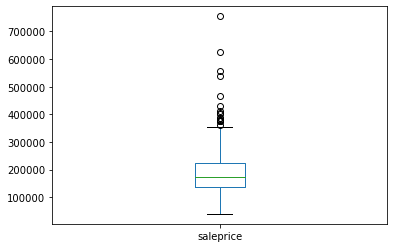

In [37]:
train10.saleprice.plot(kind ='box');

**Most houses** have **no pool**, while of those who have a pool the size is more than **500sq.ft**.

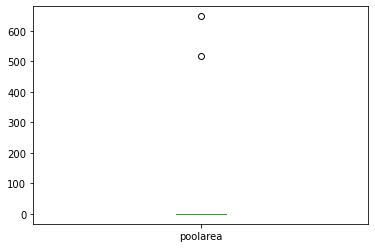

In [38]:
train10.poolarea.plot(kind ='box');

Since only **two houses** have a pool, the column can be **dropped**.

In [39]:
train10.poolarea.value_counts().sort_values()

648      1
519      1
0      736
Name: poolarea, dtype: int64

In [40]:
train11 = train10.drop('poolarea', axis = 1)

In [41]:
train11.head()

,mszoning,lotarea,housestyle,yearbuilt,centralair,garagecars,garagearea,yrsold,saleprice
0,RL,8450,2Story,2003,1,2,548,2008,208500
1,RL,9600,1Story,1976,1,2,460,2007,181500
2,RL,11250,2Story,2001,1,2,608,2008,223500
4,RL,14260,2Story,2000,1,3,836,2008,250000
6,RL,10084,1Story,2004,1,2,636,2007,307000


Most lots are between **8,410sq.ft and 11,990sq.ft**, while a considerable number of outliers with larger lots exist.

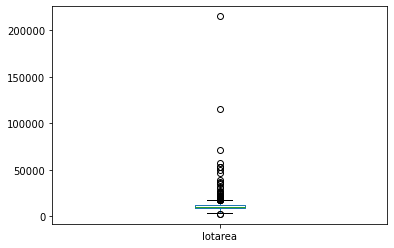

In [42]:
train11.lotarea.plot(kind ='box');

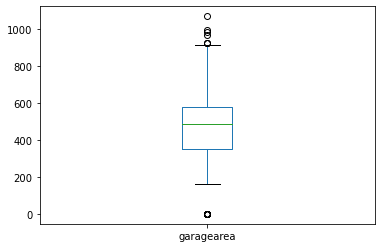

In [43]:
train11.garagearea.plot(kind ='box');

***Summary of 2.2.2 Handling Numeric Data Types***

1. The median price of family houses is between USD 100,000 and USD 200,000, while at around USD 350,000 fewer houses are sold  (outliers).
2. Most lots are between 8,410sq.ft and 11,990sq.ft, while a considerable number of outliers with larger lots exist.
3. Most houses have no pool, while of those who have a pool the size is more than 500sq.ft.

### **3. Data Relations**

From **2006** to **2009**, the number of sales rose, while in 2010 it **declined**. In spite of the populations' decreasing buying power, the financial crisis of **2007/2008**, did not lead to a decline of sales. This might be attributed to foreclosed homes readily turned over in the housing market. In **2010** sales declined. This might be due to a moderation of the housing market following the bubble, or may also suggest an **incomplete dataset**.

In [44]:
train11['no_houses'] = 1

In [45]:
no_houses = train11.groupby(['yrsold'])['no_houses'].sum().reset_index()
no_houses

,yrsold,no_houses
0,2006,137
1,2007,162
2,2008,160
3,2009,181
4,2010,98


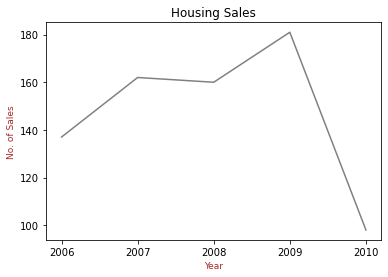

In [46]:
fig, ax = plt.subplots()
x = no_houses['yrsold']
y = no_houses['no_houses']
ax.set_xlabel('Year', color="brown",fontsize=9)
ax.set_xticks([2006, 2007, 2008, 2009, 2010])
ax.set_ylabel('No. of Sales', color="brown",fontsize=9)
ax.set_title('Housing Sales')
ax.plot(x, y, color = 'grey');

Between 2006 and 2010, the average houses sold were around **35 years** old.

In [47]:
train11['age_houses'] = train11['yrsold']-train11['yearbuilt']
train11.head()

,mszoning,lotarea,housestyle,yearbuilt,centralair,garagecars,garagearea,yrsold,saleprice,no_houses,age_houses
0,RL,8450,2Story,2003,1,2,548,2008,208500,1,5
1,RL,9600,1Story,1976,1,2,460,2007,181500,1,31
2,RL,11250,2Story,2001,1,2,608,2008,223500,1,7
4,RL,14260,2Story,2000,1,3,836,2008,250000,1,8
6,RL,10084,1Story,2004,1,2,636,2007,307000,1,3


In [48]:
train11.age_houses.describe()

count    738.000000
mean      35.174797
std       27.628482
min        0.000000
25%       10.000000
50%       34.000000
75%       51.000000
max      136.000000
Name: age_houses, dtype: float64

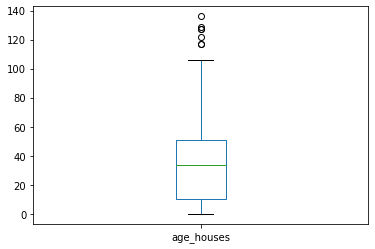

In [49]:
train11.age_houses.plot(kind = 'box');

From 2006 to 2010, the age of houses are **stable**.

In [50]:
train11.groupby(['yrsold'])['age_houses'].mean()

yrsold
2006    32.343066
2007    36.222222
2008    35.918750
2009    34.823204
2010    36.836735
Name: age_houses, dtype: float64

While **RL and RM** have the same official specification of a **min. lot area of 6,000sqft** and **no official specifications for a garage** <Link>(https://www.qcode.us/codes/huntingtonbeach/view.php?topic=zoning_code-21-210-210_06), differences between RL and RM can be observed in the data at hand. 
    
Between 2006 and 2010, **RL** sold had a lot area around **11,800sq.ft**, while **RM** were smaller with a lot area of around **7,000 to 8,000 sq.ft**. Whether a house had one or two stories was **not related** with the size of lot area among **RL**. One-story houses of **RM** were around **1,000sq.ft smaller** than two-story houses.  

In [51]:
train11.groupby(['mszoning','housestyle'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()

<ipython-input-51-26cae33631b9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train11.groupby(['mszoning','housestyle'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()


,mszoning,housestyle,lotarea,garagearea,saleprice
0,RL,1Story,11888.0,469.0,173405.0
1,RL,2Story,11779.0,535.0,225103.0
2,RM,1Story,6980.0,344.0,104670.0
3,RM,2Story,8098.0,397.0,139595.0


The average sales price per year for a family house is about **USD 185,000 to USD 190,000**. During the financial crisis in **2008**, there was a **steep decline** in housing prices of around **USD 10,000**. Houses of **smaller size** were sold, while garage size remained the same. In **2009**, the market **recovered** to pre-crisis levels.

In [52]:
trend = train11.groupby(['yrsold'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()
trend.head()

<ipython-input-52-90ce1a1e3a78>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  trend = train11.groupby(['yrsold'])['lotarea', 'garagearea', 'saleprice'].mean().round().reset_index()


,yrsold,lotarea,garagearea,saleprice
0,2006,12082.0,496.0,193657.0
1,2007,11439.0,483.0,187983.0
2,2008,10412.0,470.0,176574.0
3,2009,12045.0,494.0,188890.0
4,2010,11532.0,466.0,186633.0


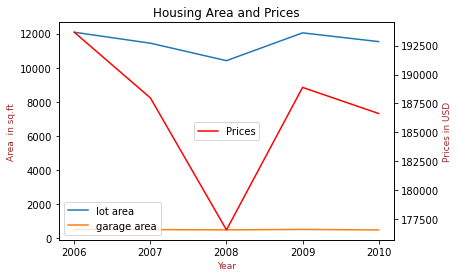

In [53]:
fig, ax = plt.subplots()
x = trend['yrsold']
y1 = trend['lotarea']
y2 = trend['garagearea']
y3 = trend['saleprice']

ax.plot(x, y1, label = 'lot area');
ax.plot(x, y2, label = 'garage area');
ax.set_xlabel('Year', color="brown",fontsize=9)
ax.set_xticks([2006, 2007, 2008, 2009, 2010])
ax.set_ylabel('Area  in sq.ft', color="brown",fontsize=9)
ax.set_title('Housing Area and Prices')
ax.legend(loc = 'lower left')
ax2 = ax.twinx()
ax2.plot(x, y3, color = 'red', label = 'Prices')
ax2.set_ylabel("Prices in USD",color="brown",fontsize=9)
ax2.legend(loc = 10)
plt.show()

The average sales price is around **USD 90,000** or **90%** higher with central aircondition.

In [54]:
train11.groupby('centralair').saleprice.mean().round().to_frame().reset_index()

,centralair,saleprice
0,0,100224.0
1,1,190393.0


***Summary of 3. Data Relations***

1. From 2006 to 2009, the number of sales rose, while in 2010 it declined. In spite of the populations' decreasing buying power, the financial crisis of 2007/2008, did not lead to a decline of sales. This might be attributed to foreclosed homes readily turned over in the housing market. In 2010 sales declined. This might be due to a moderation of the housing market following the bubble, or may also suggest an incomplete dataset.

2. The average sales price per year for a family house is about USD 185,000 to USD 190,000. During the financial crisis in 2008, there was a steep decline in housing prices of around USD 10,000. Houses of smaller size were sold, while garage size remained the same. In 2009, the market recovered to pre-crisis levels.

3. The average sales price is around USD 90,000 or 90% higher with central aircondition.

4. While RL and RM have the same official specification of a min. lot area of 6,000sqft and no official specifications for a garage (https://www.qcode.us/codes/huntingtonbeach/view.php?topic=zoning_code-21-210-210_06), differences between RL and RM can be observed in the data at hand. Between 2006 and 2010, RL sold had a lot area around 11,800sq.ft, while RM were smaller with a lot area of around 7,000 to 8,000 sq.ft. Whether a house had one or two stories was not related with the size of lot area among RL. One-story houses of RM were around 1,000sq.ft smaller than two-story houses.

5. Between 2006 and 2010, the average houses sold were around 35 years old, and stable.



## **4. More Complex Analysis**

Most garages sold fit **2 cars**.

In [55]:
garage_price = train11.groupby('garagecars')['saleprice'].agg(["count", "sum"]).reset_index()

In [56]:
garage_price.columns = ['garagecars', 'no_garages', 'price']
garage_price2 = pd.DataFrame(garage_price)
garage_price2

,garagecars,no_garages,price
0,0,27,2532750
1,1,182,24028807
2,2,436,82753974
3,3,91,28010572
4,4,2,388979


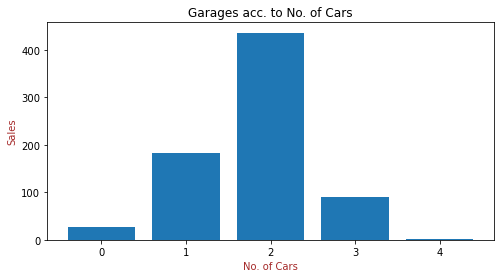

In [57]:
plt.figure(figsize=[8,4])
x = garage_price2['garagecars']
y = garage_price2['no_garages']
plt.bar(x,y)
plt.xlabel ('No. of Cars', color = 'brown')
plt.ylabel('Sales', color = 'brown')
plt.title('Garages acc. to No. of Cars')
plt.show();

The number of cars a garage fits seems to **correlate** with the price per house.

In [58]:
garage_price2['price_per_garagecars'] = round(garage_price2['price']/garage_price2['no_garages'])
garage_price2

,garagecars,no_garages,price,price_per_garagecars
0,0,27,2532750,93806.0
1,1,182,24028807,132026.0
2,2,436,82753974,189803.0
3,3,91,28010572,307808.0
4,4,2,388979,194490.0


The datapoints seem to follow a **certain direction** except for the last point. Housing prices seem to rise until garages fit in **three cars**. Garages with four cars claim a similar housing price like houses with **two cars**. 

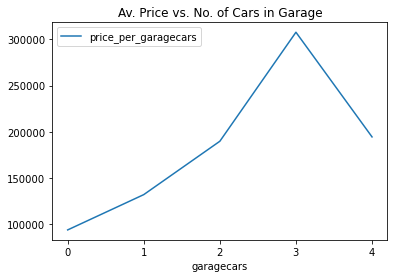

In [59]:
# Line graph of av. price
garage_price2.plot(x='garagecars', y='price_per_garagecars')
plt.title('Av. Price vs. No. of Cars in Garage')
plt.xticks([0,1,2,3,4])
plt.show();

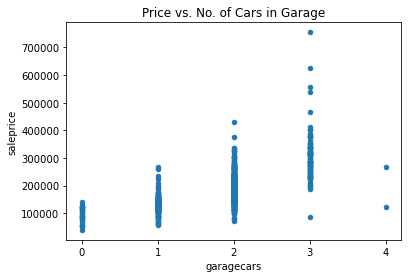

In [60]:
# Visual distribution of data points
train11.plot.scatter(x='garagecars', y = 'saleprice')
plt.xticks([0,1,2,3,4])
plt.title('Price vs. No. of Cars in Garage')
plt.show();

A **positive covariance** confirms the assumption that the datapoints follow a certain direction.

In [61]:
# Calculating the covariance
cov = np.cov(train11['saleprice'], train11['garagecars'], ddof = 1)
cov

array([[5.56516119e+09, 3.52858088e+04],
       [3.52858088e+04, 4.91263196e-01]])

In [62]:
cov[0,1]

35285.80882726058

The correlation coefficient is **close to 1** which suggests a strong correlation. It is **positive** which means that the more cars a garage fits in, the higher the price tends to be. 

In [63]:
# Calculating the correlation
corrcoef = np.corrcoef(train11['saleprice'], train11['garagecars'])
corrcoef

array([[1.        , 0.67484508],
       [0.67484508, 1.        ]])

In [64]:
corrcoef[0,1]

0.6748450831728251

The following prediction can be made: For **every additional car** that fits in a garage, the price goes up by **7.183e+04**.
However, at **4 cars** the number of sales and price goes down. 

In [65]:
# Calculating OLS
train11.reset_index(drop = 'True')

,mszoning,lotarea,housestyle,yearbuilt,centralair,garagecars,garagearea,yrsold,saleprice,no_houses,age_houses
0,RL,8450,2Story,2003,1,2,548,2008,208500,1,5
1,RL,9600,1Story,1976,1,2,460,2007,181500,1,31
2,RL,11250,2Story,2001,1,2,608,2008,223500,1,7
3,RL,14260,2Story,2000,1,3,836,2008,250000,1,8
4,RL,10084,1Story,2004,1,2,636,2007,307000,1,3
...,...,...,...,...,...,...,...,...,...,...,...
733,RL,7917,2Story,1999,1,2,460,2007,175000,1,8
734,RL,13175,1Story,1978,1,2,500,2010,210000,1,32
735,RL,9042,2Story,1941,1,1,252,2010,266500,1,69
736,RL,9717,1Story,1950,1,1,240,2010,142125,1,60


In [66]:
x = train11['garagecars']
y = train11['saleprice']
X = sm.add_constant(x)

In [67]:
model = sm.OLS(y, X)
results = model.fit() 

In [68]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     615.5
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           3.24e-99
Time:                        23:24:34   Log-Likelihood:                -9102.7
No. Observations:                 738   AIC:                         1.821e+04
Df Residuals:                     736   BIC:                         1.822e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.668e+04   5616.103     10.092      0.000    4.56e+04    6.77e+04
garagecars  7.183e+04   2895.178     24.809      0.000    6.61e+04    7.75e+04
==============================================================================
Omnibus:                      354.769   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4732.108
Skew:                           1.812   Prob(JB):                         0.00
Kurtosis:                      14.864   Cond. No.                         6.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

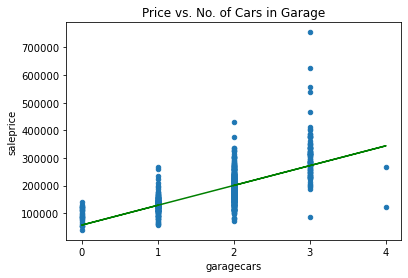

In [69]:
train11.plot.scatter(x='garagecars', y = 'saleprice')
plt.xticks([0,1,2,3,4])
plt.title('Price vs. No. of Cars in Garage')
plt.plot(x, results.predict(X), color = 'green')
plt.show();

***Summary of 4. More Complex Analysis***

1. Most garages sold fit **2 cars**.
2. Housing prices seem to rise until garages fit in three cars. Garages with four cars claim a similar housing price like houses with two cars.
3. A positive covariance confirms the assumption that the datapoints follow a certain direction.
4. The correlation coefficient is close to 1 which suggests a strong correlation. It is positive which means that the more cars a garage fits in, the higher the price tends to be.
5. The following prediction can be made: For every additional car that fits in a garage, the price goes up by 7.183e+04. However, at 4 cars the number of sales and price goes down.

## **5. Save New Dataset to CSV**

In [70]:
train11.to_csv('train11.csv')